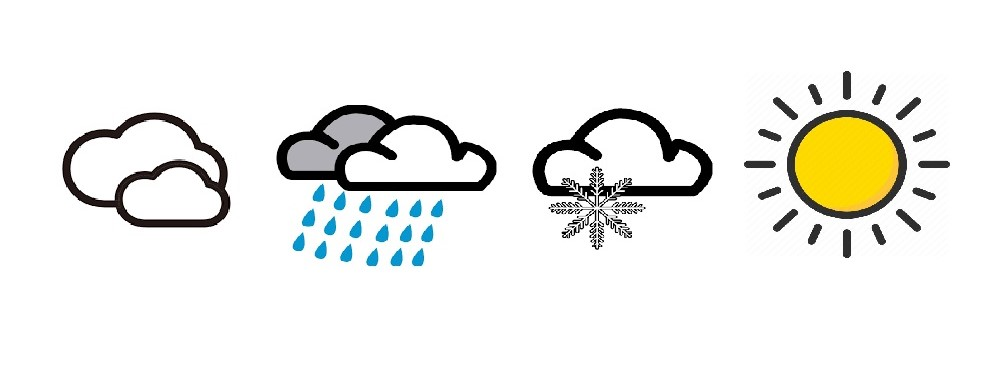

# Weather Type Classification

Data source: https://www.kaggle.com/datasets/nikhil7280/weather-type-classification

## Overview

This dataset is synthetically generated to mimic weather data for classification tasks. It includes various weather-related features and categorizes the weather into four types: Rainy, Sunny, Cloudy, and Snowy. This dataset is designed for practicing classification algorithms, data preprocessing, and outlier detection methods.

Columns decription:

* Temperature (numeric): The temperature in degrees Celsius, ranging from extreme cold to extreme heat.ther type.

* Humidity (numeric): The humidity percentage, including values above 100% to introduce outliers.

* Wind Speed (numeric): The wind speed in kilometers per hour, with a range including unrealistically high values.

* Precipitation (%) (numeric): The precipitation percentage, including outlier values.

* Cloud Cover (categorical): The cloud cover description.

* Atmospheric Pressure (numeric): The atmospheric pressure in hPa, covering a wide range.

* UV Index (numeric): The UV index, indicating the strength of ultraviolet radiation.

* Season (categorical): The season during which the data was recorded.

* Visibility (km) (numeric): The visibility in kilometers, including very low or very high values.

* Location (categorical): The type of location where the data was recorded.

* Weather Type (categorical): The target variable for classification, indicating the weather type.

#### This notebook is developed by Data Science and Machine Learning criterias including 3 parts:

* Data loading, analysis and visualization  

* Data preprocessing

* Modeling and evaluating

# Part 1

## Data loading, analysis and visualization

In [188]:
# Import necessaries
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from pandas import read_csv , get_dummies , DataFrame , concat
from scipy import stats
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay , confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [189]:
# Data loading
file = read_csv('weather_classification_data.csv')
df = file.copy()
df.sample(10)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
11150,28.0,23,3.5,18.0,clear,1027.16,6,Autumn,9.5,mountain,Sunny
12460,0.0,92,9.0,76.0,overcast,994.23,1,Winter,1.5,inland,Snowy
7149,11.0,71,14.0,55.0,overcast,1013.49,1,Spring,2.5,mountain,Rainy
7567,0.0,67,5.5,92.0,partly cloudy,984.81,0,Winter,2.0,mountain,Snowy
8429,11.0,54,6.0,42.0,partly cloudy,1011.56,1,Autumn,5.5,mountain,Cloudy
13042,31.0,69,7.5,56.0,overcast,1003.59,2,Autumn,1.0,inland,Rainy
9705,13.0,72,14.0,18.0,partly cloudy,1012.23,4,Spring,6.5,coastal,Cloudy
10617,32.0,62,9.5,4.0,clear,1012.80,6,Summer,9.0,mountain,Sunny
12660,2.0,89,16.5,76.0,overcast,991.63,0,Winter,1.0,inland,Snowy
6818,-3.0,61,1.5,50.0,overcast,990.06,1,Winter,4.0,mountain,Snowy


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [191]:
# Find number of null data
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [192]:
# Find number of duplicated data
df.duplicated().sum()

0

Visualization of categorical columns

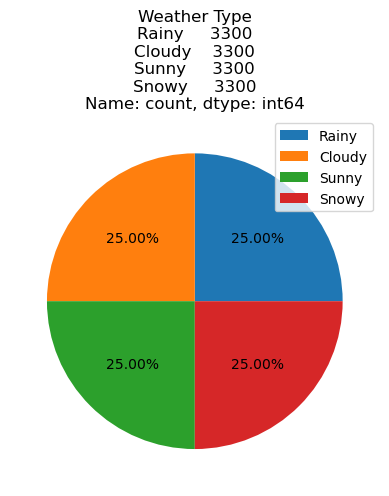

In [193]:
plt.pie(df['Weather Type'].value_counts().values,autopct='%0.02f%%')
plt.legend(df['Weather Type'].unique())
plt.title(f'{df['Weather Type'].value_counts()}')
plt.show()

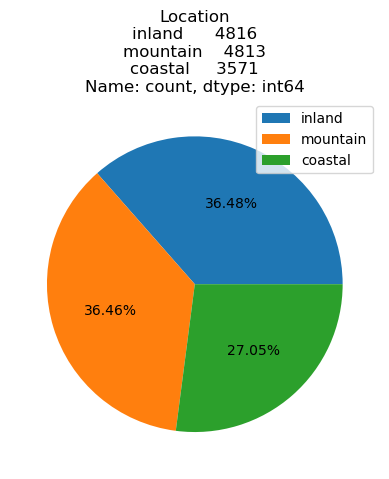

In [194]:
plt.pie(df['Location'].value_counts().values,autopct='%0.02f%%')
plt.legend(df['Location'].unique())
plt.title(f'{df['Location'].value_counts()}')
plt.show()

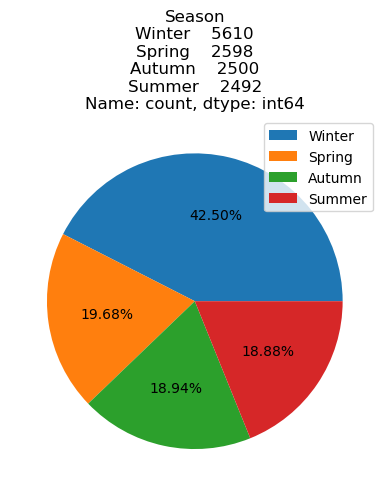

In [195]:
plt.pie(df['Season'].value_counts().values,autopct='%0.02f%%')
plt.legend(['Winter', 'Spring', 'Autumn' ,'Summer'])
plt.title(f'{df['Season'].value_counts()}')
plt.show()

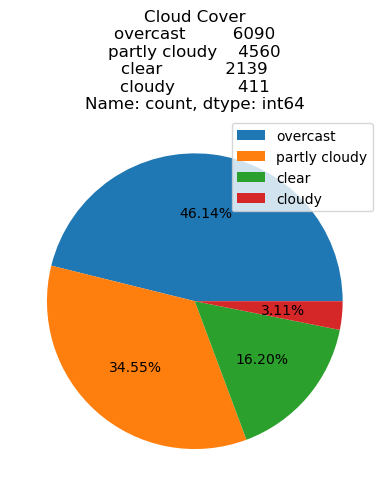

In [196]:
plt.pie(df['Cloud Cover'].value_counts().values,autopct='%0.02f%%')
plt.legend(['overcast','partly cloudy','clear','cloudy'])
plt.title(f'{df['Cloud Cover'].value_counts()}')
plt.show()

In [197]:
# Find mean of numeric columns from each label
res = list()
for l in df['Weather Type'].unique():
    temp_df = df[df['Weather Type']==l] # Make a data frame from each label 
    res.append([l,temp_df['Temperature'].mean(), # Add mean of numeric columns to the list
                  temp_df['Humidity'].mean(),
                  temp_df['Wind Speed'].mean(),
                  temp_df['Precipitation (%)'].mean(),
                  temp_df['Atmospheric Pressure'].mean(),
                  temp_df['UV Index'].mean(),
                  temp_df['Visibility (km)'].mean(),])

# Make a data frame from results
res = DataFrame(res,columns=['Weather Type','Temperature mean','Humidity mean','Wind Speed mean','Precipitation (%) mean','Atmospheric Pressure meam',
                             'UV Index mean','Visibility (km) mean'])
res

,Weather Type,Temperature mean,Humidity mean,Wind Speed mean,Precipitation (%) mean,Atmospheric Pressure meam,UV Index mean,Visibility (km) mean
0,Rainy,22.788182,78.397879,13.677576,74.752424,1004.149848,2.684242,3.628485
1,Cloudy,22.823636,66.528788,8.601818,40.286364,1010.170724,3.583939,7.071212
2,Sunny,32.429091,51.406364,6.073182,24.952727,1017.939170,7.804545,7.560455
3,Snowy,-1.530606,78.510303,10.976212,74.586061,991.051842,1.950303,3.591515


Find outliers in numeric columns using Z score

In [198]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [199]:
# Calculate the Z-score for each value in the DataFrame
z_scores = np.abs(stats.zscore(df[[col for col in df.columns if df[col].dtype!='O']]))
# Identify columns where any Z-score is greater than 3
outliers = (z_scores > 3).any(axis=0)
# Print the columns with potential outliers
print(f"Columns with potential outliers: {df[[col for col in df.columns if df[col].dtype!='O']].columns[outliers]}")

Columns with potential outliers: Index(['Temperature', 'Wind Speed', 'Atmospheric Pressure', 'Visibility (km)'], dtype='object')


In [200]:
# Calculate Z-scores only for 'Temperature', 'Wind Speed', 'Atmospheric Pressure', 'Visibility (km)'
z_scores = np.abs(stats.zscore(df[['Temperature', 'Wind Speed', 'Atmospheric Pressure', 'Visibility (km)']]))
# Create a boolean mask to filter out rows where Z-score > 3 in either column
Filter = (z_scores < 3).all(axis=1)
# Filter the DataFrame
df_cleaned = df[Filter]
print("Shape before removing outliers:", df.shape)
print("Shape after removing outliers:", df_cleaned.shape)

Shape before removing outliers: (13200, 11)
Shape after removing outliers: (12151, 11)


In [201]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12151 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           12151 non-null  float64
 1   Humidity              12151 non-null  int64  
 2   Wind Speed            12151 non-null  float64
 3   Precipitation (%)     12151 non-null  float64
 4   Cloud Cover           12151 non-null  object 
 5   Atmospheric Pressure  12151 non-null  float64
 6   UV Index              12151 non-null  int64  
 7   Season                12151 non-null  object 
 8   Visibility (km)       12151 non-null  float64
 9   Location              12151 non-null  object 
 10  Weather Type          12151 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [202]:
df_cleaned.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,12151.000000,12151.000000,12151.000000,12151.000000,12151.000000,12151.000000,12151.000000
mean,19.015966,69.293062,9.434820,52.640935,1006.150373,3.737388,5.152703
std,16.172768,19.683611,5.984465,32.055038,17.519788,3.684748,2.727016
min,-25.000000,20.000000,0.000000,0.000000,894.240000,0.000000,0.000000
25%,4.000000,59.000000,5.000000,19.000000,995.555000,1.000000,3.000000
50%,22.000000,70.000000,8.500000,57.000000,1007.780000,2.000000,5.000000
75%,30.000000,84.000000,13.500000,81.000000,1016.380000,6.000000,7.500000
max,71.000000,109.000000,30.500000,109.000000,1116.160000,14.000000,15.500000


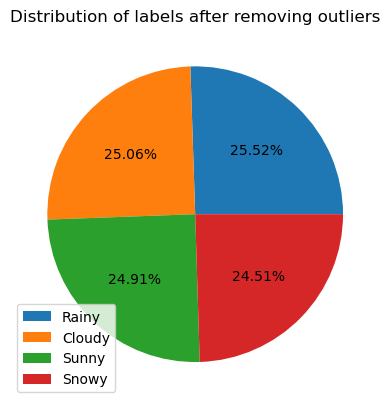

In [203]:
plt.pie(df_cleaned['Weather Type'].value_counts().values,autopct='%0.02f%%')
plt.legend(df_cleaned['Weather Type'].unique())
plt.title(f'Distribution of labels after removing outliers')
plt.show()

In [204]:
label = df_cleaned['Weather Type'] # Seperate labels
df_cleaned = df_cleaned.drop(['Weather Type'],axis=1) # Remove labels from data frame
num_df = df_cleaned[[column for column in df_cleaned.columns if df_cleaned[column].dtype!='O']] # Make a data frame from numeric columns 
nan_df = df_cleaned.drop(num_df.columns,axis=1) # Make a data frame from non-numeric columns

In [205]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12151 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           12151 non-null  float64
 1   Humidity              12151 non-null  int64  
 2   Wind Speed            12151 non-null  float64
 3   Precipitation (%)     12151 non-null  float64
 4   Atmospheric Pressure  12151 non-null  float64
 5   UV Index              12151 non-null  int64  
 6   Visibility (km)       12151 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 759.4 KB


In [206]:
num_df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,12151.000000,12151.000000,12151.000000,12151.000000,12151.000000,12151.000000,12151.000000
mean,19.015966,69.293062,9.434820,52.640935,1006.150373,3.737388,5.152703
std,16.172768,19.683611,5.984465,32.055038,17.519788,3.684748,2.727016
min,-25.000000,20.000000,0.000000,0.000000,894.240000,0.000000,0.000000
25%,4.000000,59.000000,5.000000,19.000000,995.555000,1.000000,3.000000
50%,22.000000,70.000000,8.500000,57.000000,1007.780000,2.000000,5.000000
75%,30.000000,84.000000,13.500000,81.000000,1016.380000,6.000000,7.500000
max,71.000000,109.000000,30.500000,109.000000,1116.160000,14.000000,15.500000


In [207]:
for col in num_df.columns:
    print(f' Mean: {num_df[col].mean():0.2f}, Median: {num_df[col].median():0.2f}, Standard Division: {num_df[col].std():0.2f} of {col} column')
    print(f'{"-"*50}')

 Mean: 19.02, Median: 22.00, Standard Division: 16.17 of Temperature column
--------------------------------------------------
 Mean: 69.29, Median: 70.00, Standard Division: 19.68 of Humidity column
--------------------------------------------------
 Mean: 9.43, Median: 8.50, Standard Division: 5.98 of Wind Speed column
--------------------------------------------------
 Mean: 52.64, Median: 57.00, Standard Division: 32.06 of Precipitation (%) column
--------------------------------------------------
 Mean: 1006.15, Median: 1007.78, Standard Division: 17.52 of Atmospheric Pressure column
--------------------------------------------------
 Mean: 3.74, Median: 2.00, Standard Division: 3.68 of UV Index column
--------------------------------------------------
 Mean: 5.15, Median: 5.00, Standard Division: 2.73 of Visibility (km) column
--------------------------------------------------


In [208]:
nan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12151 entries, 0 to 13199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cloud Cover  12151 non-null  object
 1   Season       12151 non-null  object
 2   Location     12151 non-null  object
dtypes: object(3)
memory usage: 379.7+ KB


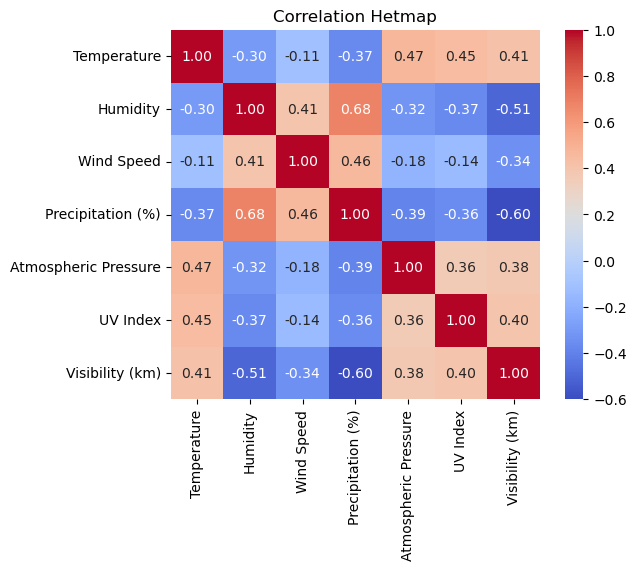

In [209]:
Corr = num_df.corr()
sn.heatmap(Corr,annot=True,fmt='.2f',cmap='coolwarm',square=True)
plt.title('Correlation Hetmap')
plt.show()

# Part 2

## Data preprocessing

In [210]:
# Encode categorical columns by One-Hot encoding technique 
encoded_df = get_dummies(nan_df)

In [211]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12151 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Cloud Cover_clear          12151 non-null  bool 
 1   Cloud Cover_cloudy         12151 non-null  bool 
 2   Cloud Cover_overcast       12151 non-null  bool 
 3   Cloud Cover_partly cloudy  12151 non-null  bool 
 4   Season_Autumn              12151 non-null  bool 
 5   Season_Spring              12151 non-null  bool 
 6   Season_Summer              12151 non-null  bool 
 7   Season_Winter              12151 non-null  bool 
 8   Location_coastal           12151 non-null  bool 
 9   Location_inland            12151 non-null  bool 
 10  Location_mountain          12151 non-null  bool 
dtypes: bool(11)
memory usage: 225.5 KB


In [212]:
# Scale numeric columns
scaled_df = stats.zscore(num_df)      
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12151 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           12151 non-null  float64
 1   Humidity              12151 non-null  float64
 2   Wind Speed            12151 non-null  float64
 3   Precipitation (%)     12151 non-null  float64
 4   Atmospheric Pressure  12151 non-null  float64
 5   UV Index              12151 non-null  float64
 6   Visibility (km)       12151 non-null  float64
dtypes: float64(7)
memory usage: 759.4 KB


In [213]:
# Create a data frame from encoded data and scaled data
final_df = concat([scaled_df.reset_index(drop=True),encoded_df.reset_index(drop=True)],axis=1)

In [214]:
final_df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Location_coastal,Location_inland,Location_mountain
0,-0.310162,0.188334,0.010892,0.915933,0.266545,-0.471527,-0.606073,False,False,False,True,False,False,False,True,False,True,False
1,1.235710,1.356867,-0.156214,0.572759,0.301365,0.885473,1.777582,False,False,False,True,False,True,False,False,False,True,False
2,0.679196,-0.268918,-0.406874,-1.143110,0.717483,0.342673,0.127359,True,False,False,False,False,True,False,False,False,False,True
3,1.173875,0.696392,-1.325958,0.915933,1.147300,0.885473,-1.522864,True,False,False,False,False,True,False,False,True,False,False
4,0.493692,0.239140,1.264188,0.416771,-0.883630,-0.742928,-0.972789,False,False,True,False,False,False,False,True,False,False,True


In [215]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12151 entries, 0 to 12150
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Temperature                12151 non-null  float64
 1   Humidity                   12151 non-null  float64
 2   Wind Speed                 12151 non-null  float64
 3   Precipitation (%)          12151 non-null  float64
 4   Atmospheric Pressure       12151 non-null  float64
 5   UV Index                   12151 non-null  float64
 6   Visibility (km)            12151 non-null  float64
 7   Cloud Cover_clear          12151 non-null  bool   
 8   Cloud Cover_cloudy         12151 non-null  bool   
 9   Cloud Cover_overcast       12151 non-null  bool   
 10  Cloud Cover_partly cloudy  12151 non-null  bool   
 11  Season_Autumn              12151 non-null  bool   
 12  Season_Spring              12151 non-null  bool   
 13  Season_Summer              12151 non-null  boo

In [216]:
final_df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,1.215100e+04,1.215100e+04,1.215100e+04,1.215100e+04,1.215100e+04,1.215100e+04,1.215100e+04
mean,8.479030e-17,9.823980e-17,-1.216302e-16,1.169521e-18,-1.183556e-15,-6.637034e-17,-1.181217e-16
std,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,-2.721722e+00,-2.504372e+00,-1.576617e+00,-1.642272e+00,-6.387919e+00,-1.014328e+00,-1.889580e+00
25%,-9.285104e-01,-5.229470e-01,-7.410860e-01,-1.049517e+00,-6.047909e-01,-7.429275e-01,-7.894313e-01
50%,1.845174e-01,3.591652e-02,-1.562142e-01,1.359925e-01,9.302021e-02,-4.715273e-01,-5.599885e-02
75%,6.791964e-01,7.471974e-01,6.793168e-01,8.847356e-01,5.839139e-01,6.140733e-01,8.607917e-01
max,3.214426e+00,2.017342e+00,3.520122e+00,1.758269e+00,6.279423e+00,2.785275e+00,3.794522e+00


In [217]:
# Splitting data into training and test sets
# 80% of data is considered as training set
xtr , xts , ytr , yts = train_test_split(final_df,label,test_size=0.2,random_state=0)

In [218]:
print('Training set size:',len(xtr))
print('Test set size:',len(xts))

Training set size: 9720
Test set size: 2431


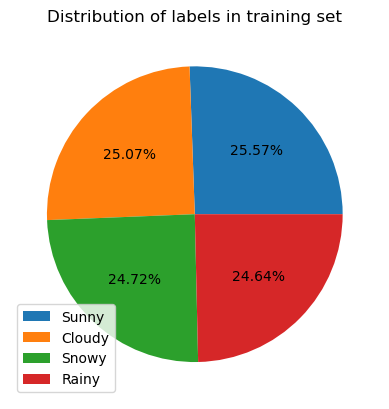

In [219]:
plt.pie(ytr.value_counts().values,autopct='%0.2f%%')
plt.legend(['Sunny','Cloudy','Snowy','Rainy'])
plt.title('Distribution of labels in training set')
plt.show()

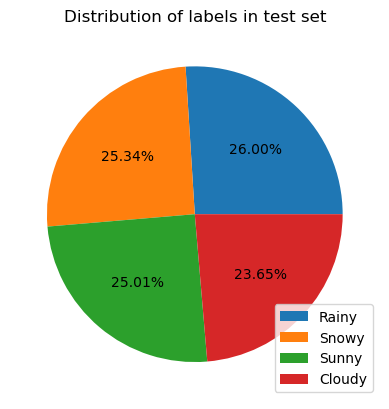

In [220]:
plt.pie(yts.value_counts().values,autopct='%0.2f%%')
plt.legend(yts.unique())
plt.title('Distribution of labels in test set')
plt.show()

# Part 3

## Modeling and evaluating

In [221]:
# Create a model from 'RandomForestClassifier' object
model = RandomForestClassifier(random_state=42,max_depth=7)

In [222]:
# Use cross validation technique in order to have better insight.
scores = cross_val_score(model,final_df,label,cv=5,scoring='accuracy')
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [0.95022624 0.9563786  0.94897119 0.95061728 0.95102881]
Mean Accuracy: 0.9514444258235107
Standard Deviation: 0.0025613992510546296


In [223]:
model.fit(xtr,ytr) # Train the model on training set
print('Accuracy on training data:',model.score(xtr,ytr)*100)

Accuracy on training data: 97.5925925925926


In [224]:
print('Accuracy on test data:',model.score(xts,yts)*100)

Accuracy on test data: 95.1048951048951


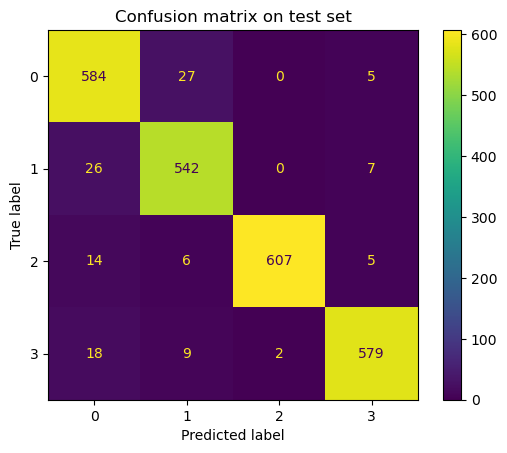

In [225]:
pred = model.predict(xts)
con = confusion_matrix(yts,pred)
display = ConfusionMatrixDisplay(con)
display.plot()
plt.title('Confusion matrix on test set')
plt.show()

In [226]:
model.fit(final_df,label) # Train the model on full data
print('Accuracy on full data:',model.score(final_df,label)*100)

Accuracy on full data: 97.3747016706444


# End